In [2]:
from scipy.optimize import minimize

In [79]:
eur_per_Ah = 11/3.5
eur_per_W = 15/3.5
light_power = 0.12 * 6
g_per_W = 96/3.5
g_per_Ah = 7/0.38

def cost(x):
    battery_size, pannel_power = x
    return battery_size * eur_per_Ah + pannel_power * eur_per_W #Eur

def weight(x):
    battery_size, pannel_power = x
    return battery_size * g_per_Ah + pannel_power * g_per_W #g

def t_charge(x):
    battery_size, pannel_power = x
    return battery_size * 3.7 / pannel_power * 3600 * 4 #s, 25% derating

def t_light(x):
    battery_size, pannel_power = x
    return battery_size * 3.7 / light_power * 3600 #s

battery_size_min = 0.38
battery_size_max = 3
pannel_power_min = 0.1
pannel_power_max = 7
x_max = [battery_size_max, pannel_power_max]
cost_max = cost(x_max)
weight_max = weight(x_max)
t_light_max = t_light(x_max)
t_charge_max = t_charge(x_max)

In [84]:
def f (x):
    return weight(x)/weight_max - t_light(x)/t_light_max + \
           cost(x) / cost_max + t_charge(x) / t_charge_max 

def constrain_weight(x):
    return -weight(x) + 120

def constrain_cost(x):
    return -cost(x) + 25

def constrain_t_light(x):
    return t_light(x) - 6 * 3600

def constrain_t_charge(x):
    return -t_charge(x) + 4 * 3600

constraints=[
      {'type':'ineq', 'fun':constrain_t_charge}, 
      {'type':'ineq', 'fun':constrain_weight}, 
      {'type':'ineq', 'fun':constrain_cost}, 
      {'type':'ineq', 'fun':constrain_t_light}
]

bounds=((battery_size_min, battery_size_max), (pannel_power_min, pannel_power_max))
x0 = [battery_size_min, pannel_power_min]

solution = minimize(f, x0, method='SLSQP', bounds=bounds, constraints=constraints)

print(f"Battery capacity: {round(solution.x[0], 1)}Ah")
print(f"Solar pannel size: {round(solution.x[1], 1)}W")
print(f"Charge time: {round(t_charge(solution.x)/3600, 1)} h realistic, {round(t_charge(solution.x)/3600 / 4, 1)} h ideal")
print(f"Light time: {round(t_light(solution.x)/3600, 1)} h")
print(f"Cost: {round(cost(solution.x), 1)} Eur")
print(f"Weight: {round(weight(solution.x))} g")
print(f"Optimization function value: {solution.fun}")
print(f"{cost(solution.x)/t_light(solution.x)} {weight(solution.x)/t_light(solution.x)}")

Battery capacity: 1.2Ah
Solar pannel size: 3.6W
Charge time: 4.8 h realistic, 1.2 h ideal
Light time: 6.0 h
Cost: 19.1 Eur
Weight: 120 g
Optimization function value: 1.338184467611604
0.0008823565315654498 0.0055555556894401345


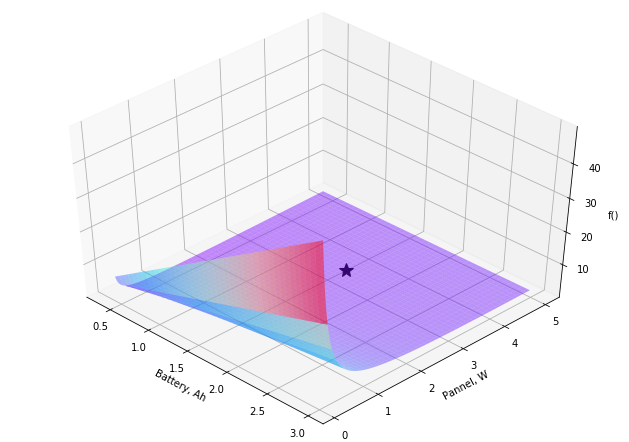

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import matplotlib
# matplotlib.use('WXAgg')
plt.rcParams['figure.figsize'] = [28/2.54, 20/2.54]

x = np.arange(battery_size_min, battery_size_max, 0.01)
y = np.arange(pannel_power_min, pannel_power_max, 0.01)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, f(xy), cmap='rainbow', alpha=0.45)
ax.plot([solution.x[0]], [solution.x[1]], [solution.fun], markerfacecolor='k', markeredgecolor='k', marker='*', markersize=15)
ax.set_xlabel('Battery, Ah')
ax.set_ylabel('Pannel, W')
ax.set_zlabel('f()')

plt.show()

In [35]:
solution

     fun: 0.9497380198549712
     jac: array([ 7.50214159e-01, -1.83589756e-04])
 message: 'Optimization terminated successfully'
    nfev: 29
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.6       , 1.40037355])